In [1]:
import pandas as pd
import io
import numpy as np

from src.models.ast_models import ASTModel

In [2]:
import sys
sys.path.insert(0, '../speech_utils') 

In [3]:
from speech_utils import *

In [4]:
from src.dataloader_gcs import AudioDataset

In [5]:
from google.cloud import storage, bigquery

In [6]:
project_name = 'ml-mps-aif-afdgpet01-p-6827'
study = 'speech_poc_freeze_1'
bucket_name = 'ml-e107-phi-shared-aif-us-p'
gcs_prefix = f'speech_ai/speech_lake/{study}'

In [7]:
storage_client = storage.Client()
bq_client = bigquery.Client()
bucket = storage_client.bucket(bucket_name)

In [8]:
file_list=[]
for blob in storage_client.list_blobs(bucket_name, prefix='speech_ai/speech_lake/speech_poc_freeze_1'):
    file_list.append(blob.name)

In [9]:
len(file_list)

7946

In [10]:
file_list[0]

'speech_ai/speech_lake/speech_poc_freeze_1/0009ee33-c45b-439e-8e38-6a613a896979/metadata.json'

In [11]:
extensions=[f.split('.')[-1] for f in file_list]

In [12]:
np.sum([e=='mp3' for e in extensions])

3973

In [13]:
data_split_root = 'gs://ml-e107-phi-shared-aif-us-p/speech_ai/share/data_splits/amr_subject_dedup_594_train_100_test_binarized_v20220620'
gcs_train_path = f'{data_split_root}/train.csv'
gcs_test_path = f'{data_split_root}/test.csv'

In [14]:
train_df = pd.read_csv(gcs_train_path, index_col = 'uid')
test_df = pd.read_csv(gcs_test_path, index_col = 'uid')

In [15]:
train_df.head()

,Hyperkinetic Dysarthria,Hypokinetic dysarthria,Flaccid dysarthria,"Apraxia of speech, Phonetic","Neurological MSD, NOS",Functional speech disorder,"Apraxia of speech, Prosodic",Spastic dysarthria,Ataxic dysarthria,"Abnormal Speech, NOS",...,hypernasal,audible nasal emission,abn loudness variability,sound substitutions,reduced syllables per breath group,stridor,low pitch,voice interruptions,increased OA loudness,prolonged sounds
uid,,,,,,,,,,,,,,,,,,,,,
4d28f730-5814-48e1-bc29-3c0bf562e2fb,0,0,0,0,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
1e2dedd0-4f93-42ee-b0fb-c77fb7ba4cf4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
f31c13e4-9f49-411e-b59f-f692244fb740,0,0,0,0,0,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,0
d917de91-c421-40bf-9d75-a0b5b0736c5b,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9c4a9e77-3080-4591-8797-d712e42d6ed6,1,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
train_df["distortions"]=((train_df["distorted Cs"]+train_df["distorted V"])>0).astype(int)
test_df["distortions"]=((test_df["distorted Cs"]+test_df["distorted V"])>0).astype(int)

In [17]:
train_df[train_df.columns[14:]].sum()

breathy                               160
loudness decay                         98
distorted Cs                          240
slow rate                             282
high pitch                             52
hoarse / harsh                        215
irregular artic breakdowns            212
rapid rate                             81
reduced OA loudness                    79
distorted V                           101
accelerating rate                      33
abn pitch variability                 168
strained                              127
hypernasal                             70
audible nasal emission                 39
abn loudness variability              162
sound substitutions                    11
reduced syllables per breath group     64
stridor                                20
low pitch                              27
voice interruptions                    27
increased OA loudness                  17
prolonged sounds                       25
distortions                       

In [18]:
target_labels=['breathy',
             'loudness decay',
             'slow rate',
             'high pitch',
             'hoarse / harsh',
             'irregular artic breakdowns',
             'rapid rate',
             'reduced OA loudness',
             'abn pitch variability',
             'strained',
             'hypernasal',
             'abn loudness variability',
              'distortions']

In [19]:
test_df[test_df.columns[14:]].sum()

breathy                               28
loudness decay                        15
distorted Cs                          36
slow rate                             46
high pitch                             9
hoarse / harsh                        32
irregular artic breakdowns            35
rapid rate                            12
reduced OA loudness                   10
distorted V                            8
accelerating rate                      2
abn pitch variability                 25
strained                              23
hypernasal                            11
audible nasal emission                 9
abn loudness variability              22
sound substitutions                    0
reduced syllables per breath group     2
stridor                                3
low pitch                              3
voice interruptions                    4
increased OA loudness                  1
prolonged sounds                       1
distortions                           37
dtype: int64

In [20]:
test_df.head()

,Hyperkinetic Dysarthria,Hypokinetic dysarthria,Flaccid dysarthria,"Apraxia of speech, Phonetic","Neurological MSD, NOS",Functional speech disorder,"Apraxia of speech, Prosodic",Spastic dysarthria,Ataxic dysarthria,"Abnormal Speech, NOS",...,audible nasal emission,abn loudness variability,sound substitutions,reduced syllables per breath group,stridor,low pitch,voice interruptions,increased OA loudness,prolonged sounds,distortions
uid,,,,,,,,,,,,,,,,,,,,,
c95e80f3-0344-465d-a3f7-62a9fc180b4e,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2c71fb64-e8e9-4b6a-9f1b-99c6c4bdfd40,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,1
1a720709-1e14-46bb-a4bc-686220e2fabe,0,1,1,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
16c78c97-42aa-498d-9793-e3dc91c154fc,0,1,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
8adbedef-13ec-4840-8cce-293bcb61d145,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [21]:
input_tdim = 1024

ast_mdl = ASTModel(
    label_dim=len(target_labels),
    fshape=128, tshape=2, fstride=128, tstride=2,input_fdim=128, 
    input_tdim=input_tdim, model_size='base',
    pretrain_stage=False,load_pretrained_mdl_path='./pretrained_model/SSAST-Base-Frame-400.pth'
)

now load a SSL pretrained models from ./pretrained_model/SSAST-Base-Frame-400.pth
pretraining patch split stride: frequency=128, time=2
pretraining patch shape: frequency=128, time=2
pretraining patch array dimension: frequency=1, time=512
pretraining number of patches=512
fine-tuning patch split stride: frequncey=128, time=2
fine-tuning number of patches=512


/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:3635: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


In [22]:
def prep_ssast_data(df,target_labels,save_name,create_label_csv=False):
    data_list=[]
    for i in range(df.shape[0]):
        data_list.append({
            'wav':df.index[i],
            'labels':df.iloc[i][target_labels].values.tolist()
        })
    
    all_labels=[d['labels'] for d in data_list]
    all_str=[('_').join(map(str, l)) for l in all_labels]
    
    label_df=pd.DataFrame({
        'mid':all_labels,
        'display_name':all_str
    })
    
    with open(save_name + '.json', 'w') as f:
        json.dump({'data': data_list}, f, indent=1)
        
    if create_label_csv:
        label_df.drop_duplicates('display_name',inplace=True)
        label_df.reset_index(inplace=True,drop=True)
        label_df.reset_index(inplace=True)
        label_df.to_csv('label_df.csv')

In [23]:
train_df=train_df[target_labels]
test_df=train_df[target_labels]

In [24]:
#target_labels = ['normal', 'Spastic dysarthria', 'apraxia of speech']

prep_ssast_data(train_df,target_labels,'train_ssast',create_label_csv=True)
prep_ssast_data(test_df,target_labels,'test_ssast')

In [25]:
dataset_mean=-4.2677393
dataset_std=4.5689974
audio_conf = {'num_mel_bins': 128, 'target_length': 1024, 'freqm': 0, 'timem': 0, 'mixup': 0, 'dataset': 'demo',
              'mode':'train', 'mean':dataset_mean, 'std':dataset_std, 'noise':False}

In [26]:
train_data=AudioDataset('train_ssast.json',audio_conf,bucket,gcs_prefix,label_csv='label_df.csv')
test_data=AudioDataset('test_ssast.json',audio_conf,bucket,gcs_prefix,label_csv='label_df.csv')

---------------the train dataloader---------------
now using following mask: 0 freq, 0 time
now using mix-up with rate 0.000000
now process demo
use dataset mean -4.268 and std 4.569 to normalize the input.
number of classes is 289
---------------the train dataloader---------------
now using following mask: 0 freq, 0 time
now using mix-up with rate 0.000000
now process demo
use dataset mean -4.268 and std 4.569 to normalize the input.
number of classes is 289


In [27]:
train_loader = torch.utils.data.DataLoader(
    train_data,
    batch_size=8, shuffle=True, num_workers=0)

test_loader = torch.utils.data.DataLoader(
    test_data,
    batch_size=8, shuffle=False, num_workers=0)

In [28]:
idx=1
spectrogram, label = train_loader.dataset[idx]

In [29]:
label

tensor([0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.])

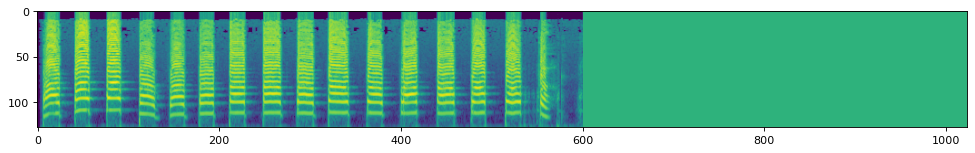

In [30]:
from matplotlib import pyplot as plt
plt.figure(num=1, figsize=(15, 15), dpi=80)
plt.imshow(spectrogram.transpose(1,0).flip(0))
plt.show()

In [31]:
batch=next(iter(train_loader))

In [32]:
prediction = ast_mdl(batch[0],task='ft_cls')

In [33]:
prediction.shape

torch.Size([8, 13])

In [34]:
prediction[1,]

tensor([ 0.0251,  0.5060, -0.6569,  0.9802, -0.7698,  0.4019,  0.4400,  0.1212,
        -0.1025, -0.9329,  0.2715, -0.2622,  0.5981],
       grad_fn=<SelectBackward0>)

In [35]:
for param in ast_mdl.v.parameters():
    param.requires_grad = False
    
model_parameters = filter(lambda p: p.requires_grad, ast_mdl.parameters())
params = sum([np.prod(p.size()) for p in model_parameters])
print(f'Number of trainable parameters: {params}')

Number of trainable parameters: 11533


In [ ]:
#ast_mdl.v.parameters

In [36]:
criterion = torch.nn.BCEWithLogitsLoss()
optim = torch.optim.AdamW([p for p in ast_mdl.parameters() if p.requires_grad])

In [37]:
epochs = 80
for e in range(epochs):
    running_loss = 0
    for i, batch in enumerate(train_loader):
        x = batch[0]
        targets = batch[1]
        optim.zero_grad()
        o =  ast_mdl(batch[0],task='ft_cls')
        loss = criterion(o, targets)
        loss.backward()
        optim.step()
        running_loss += loss.item()
        print(f'Progress: {round(i/len(train_loader)*100)}%    ',end='\r')
        
    print(e, running_loss/len(train_loader))

0 0.5444328101476034
1 0.5123136834303538
2 0.5029803915818533
3 0.4915827814737956
4 0.49061817447344463
5 0.4820948890844981
6 0.4783046559492747
7 0.4764783720175425
8 0.46526849110921226
9 0.4655648195743561
10 0.46353145440419513
11 0.45640701611836754
12 0.4536081624031067
13 0.4526054004828135
14 0.4456606614589691
15 0.444079882701238
16 0.43912473917007444
17 0.4387890241543452
18 0.43514652331670123
19 0.4333126962184906
20 0.4273082411289215
21 0.4293350950876872
22 0.42406383991241453
23 0.42376610040664675
24 0.42021980524063113
25 0.4199077232678731
26 0.41638053158919014
27 0.41225723663965863
28 0.41030267814795174
29 0.40903358976046245
30 0.40793089667956034
31 0.41063364466031393
32 0.40565746545791626
33 0.4053640866279602
34 0.40094220876693726
35 0.4017530624071757
36 0.39734172900517783
37 0.395788954893748
38 0.3946167560418447
39 0.39532194058100384
40 0.3932345422108968
41 0.39389167487621307
42 0.3911034071445465
43 0.3861155378818512
44 0.3859003969033559
45

In [36]:
criterion = torch.nn.BCEWithLogitsLoss()
optim = torch.optim.AdamW([p for p in ast_mdl.parameters() if p.requires_grad])

In [ ]:
epochs = 60
for e in range(epochs):
    running_loss = 0
    for i, batch in enumerate(train_loader):
        x = batch[0]
        targets = batch[1]
        optim.zero_grad()
        o =  ast_mdl(batch[0],task='ft_cls')
        loss = criterion(o, targets)
        loss.backward()
        optim.step()
        running_loss += loss.item()
        print(f'Progress: {round(i/len(train_loader)*100)}%    ',end='\r')
        
    print(e, running_loss/len(train_loader))

0 0.5478242878119151
1 0.5399095229307811
2 0.5356989073753357
3 0.5325702508290608
4 0.5292442293961843
5 0.5243809584776561
6 0.5255300176143646
7 0.5191001979509989
8 0.5156674782435099
9 0.5103721328576406
10 0.5109198002020517
11 0.5110910558700561
12 0.5104552404085795
13 0.4989348057905833
14 0.49756896058718364
15 0.5066890895366669
16 0.49151962717374165
17 0.5057073978583018
18 0.4900615147749583
19 0.4852969813346863
20 0.4871922226746877
21 0.48569448630015055
22 0.48558212439219156
23 0.4853310441970825
24 0.4747785417238871
25 0.47251729647318524
26 0.47487553596496584
27 0.46364206155141197


In [42]:
torch.save(ast_mdl.state_dict(), 'ast_mdl_base_frame_400_speechfeat_13_adamw_80epoch.pt')

In [38]:
ast_mdl.eval()
all_preds=[]
all_targets=[]
for i, batch in enumerate(test_loader):
    x = batch[0]
    targets = batch[1]
    optim.zero_grad()
    o=ast_mdl(batch[0],task='ft_cls')
    all_preds.append(o)
    all_targets.append(targets)
    print(f'Progress: {round(i/len(test_loader)*100)}%    ',end='\r')

In [51]:
pred_mat=torch.sigmoid(torch.cat(all_preds)).detach().numpy()

In [52]:
target_mat=torch.cat(all_targets).detach().numpy()

In [58]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

aucs=roc_auc_score(target_mat, pred_mat, average = None)
print(aucs)

[0.81359447 0.84853316 0.89390116 0.88922793 0.82539118 0.82231058
 0.85897528 0.87631805 0.81902526 0.81845926 0.8660578  0.85558128
 0.84275097]


In [71]:
data = [
('Label', target_labels),
('AUC', target_labels)]

In [78]:
pd.DataFrame({'Label':target_labels, 'AUC':aucs})

,Label,AUC
0,breathy,0.813594
1,loudness decay,0.848533
2,slow rate,0.893901
3,high pitch,0.889228
4,hoarse / harsh,0.825391
5,irregular artic breakdowns,0.822311
6,rapid rate,0.858975
7,reduced OA loudness,0.876318
8,abn pitch variability,0.819025
9,strained,0.818459


In [39]:
pred_mat=torch.sigmoid(torch.cat(all_preds)).detach().numpy()
target_mat=torch.cat(all_targets).detach().numpy()
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
aucs=roc_auc_score(target_mat, pred_mat, average = None)
print(aucs)

[0.8655962  0.89226053 0.92539553 0.9449333  0.85528625 0.88511311
 0.90794888 0.92102741 0.86031467 0.88160313 0.90853326 0.89027492
 0.8834618 ]


In [40]:
data = [
('Label', target_labels),
('AUC', target_labels)]

In [41]:
pd.DataFrame({'Label':target_labels, 'AUC':aucs})

,Label,AUC
0,breathy,0.865596
1,loudness decay,0.892261
2,slow rate,0.925396
3,high pitch,0.944933
4,hoarse / harsh,0.855286
5,irregular artic breakdowns,0.885113
6,rapid rate,0.907949
7,reduced OA loudness,0.921027
8,abn pitch variability,0.860315
9,strained,0.881603


In [76]:
data

[('Label',
  ['breathy',
   'loudness decay',
   'slow rate',
   'high pitch',
   'hoarse / harsh',
   'irregular artic breakdowns',
   'rapid rate',
   'reduced OA loudness',
   'abn pitch variability',
   'strained',
   'hypernasal',
   'abn loudness variability',
   'distortions']),
 ('AUC',
  ['breathy',
   'loudness decay',
   'slow rate',
   'high pitch',
   'hoarse / harsh',
   'irregular artic breakdowns',
   'rapid rate',
   'reduced OA loudness',
   'abn pitch variability',
   'strained',
   'hypernasal',
   'abn loudness variability',
   'distortions'])]

In [43]:
plot_labels=np.array(target_labels)

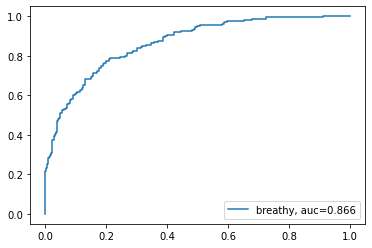

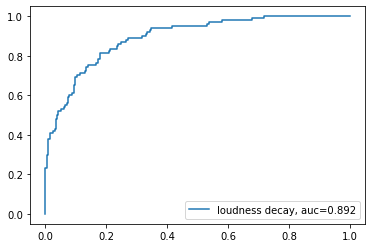

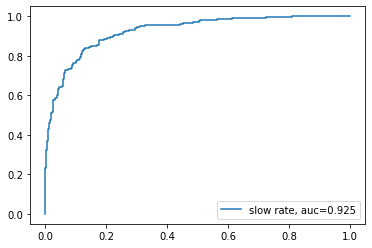

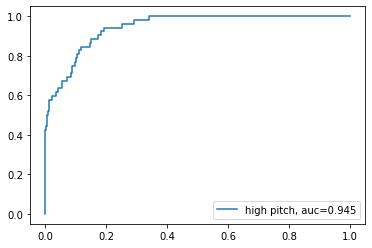

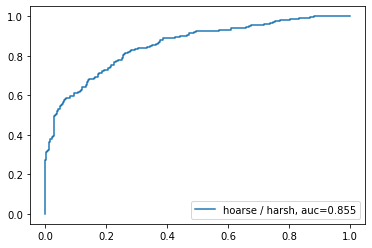

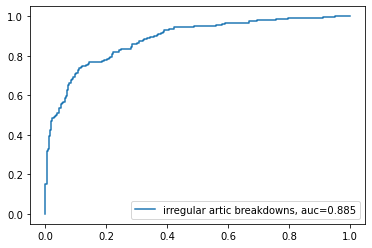

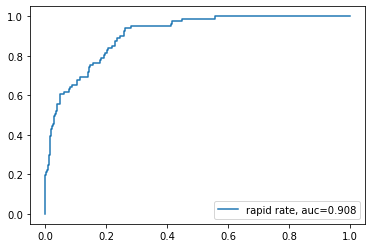

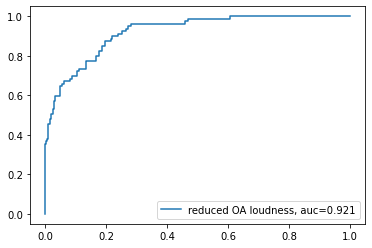

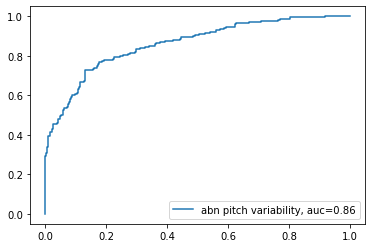

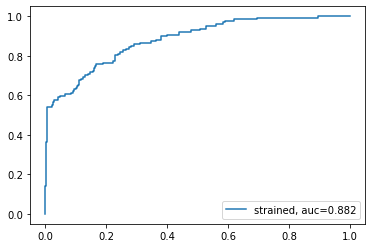

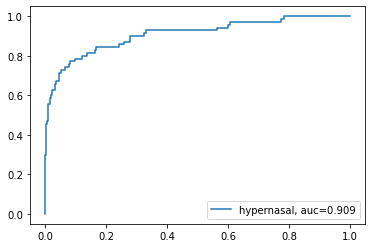

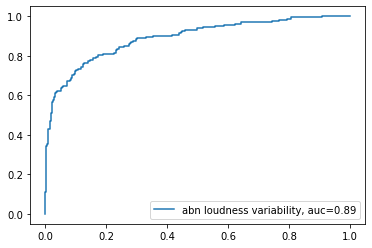

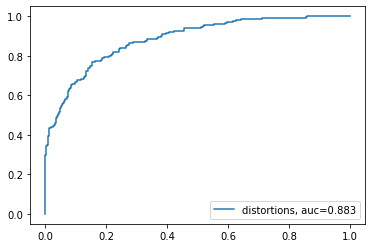

In [44]:
for i in range(len(aucs)):
    fpr, tpr, _ = roc_curve(target_mat[:,i],  pred_mat[:,i])
    plt.plot(fpr,tpr,label=plot_labels[i]+", auc="+str(round(aucs[i],3)))
    plt.legend(loc=4)
    plt.show()

In [414]:
ast_mdl = ASTModel(
    label_dim=len(target_labels),
    fshape=128, tshape=2, fstride=128, tstride=2,input_fdim=128, 
    input_tdim=input_tdim, model_size='base',
    pretrain_stage=False,load_pretrained_mdl_path='./pretrained_model/SSAST-Base-Frame-400.pth'
)

now load a SSL pretrained models from ./pretrained_model/SSAST-Base-Frame-400.pth
pretraining patch split stride: frequency=128, time=2
pretraining patch shape: frequency=128, time=2
pretraining patch array dimension: frequency=1, time=512
pretraining number of patches=512
fine-tuning patch split stride: frequncey=128, time=2
fine-tuning number of patches=512


/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:3635: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


In [415]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
sd = torch.load('./ast_mdl_base_frame_400_speechfeat_13.pt', map_location=device)
ast_mdl.load_state_dict(sd, strict=False)

In [416]:
ast_mdl.load_state_dict(sd, strict=False)

<All keys matched successfully>

In [419]:
print(ast_mdl.v.blocks[11].attn.attn_drop)

Dropout(p=0.0, inplace=False)


In [420]:
def getActivation(name):
  # the hook signature
  def hook(model, input, output):
    activation[name] = output.detach()
  return hook

In [603]:
activation = {}

In [604]:
h1 = ast_mdl.v.blocks[11].attn.attn_drop.register_forward_hook(getActivation('attention'))

In [605]:
batch=next(iter(train_loader))

In [606]:
img=batch[0][0].reshape(1,1024,-1)

In [607]:
spectrogram, label = train_loader.dataset[idx]

In [608]:
img=spectrogram.reshape(1,1024,-1)

In [609]:
out = ast_mdl(img,task='ft_cls')

In [610]:
#activation

In [611]:
h1.remove()

In [612]:
heatmap=activation['attention']

In [613]:
heatmap.shape

torch.Size([1, 12, 514, 514])

1.3333333333333333

1536.0

In [139]:
import numpy as np
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap



def overlay_heat_map(
        img: np.ndarray, heat_map: np.ndarray, color=(255, 0, 0)) -> np.ndarray:
    """
    heat_map values should be in [0, 1]
    """
    assert (heat_map.shape[0] == img.shape[0]) and (heat_map.shape[1] == img.shape[1])
    # overlay = np.tile(color, (*img.shape[:2], 1))
    overlay = cm.hot(heat_map)[..., :1] * 255
    heat_map = heat_map[..., None].repeat(3, -1)
    img = (img * (1 - heat_map) + overlay * heat_map).astype(np.uint8)
    return img
    # return overlay.astype(np.uint8)
    
def overlay_black_map(
        img: np.ndarray, heat_map: np.ndarray, color=(255, 0, 0)) -> np.ndarray:
    """
    heat_map values should be in [0, 1]
    """
    assert (heat_map.shape[0] == img.shape[0]) and (heat_map.shape[1] == img.shape[1])
    # overlay = np.tile(color, (*img.shape[:2], 1))
    #overlay = (1-heat_map)[..., :3] * 255
    cmap = np.zeros([256, 4])
    cmap = ListedColormap(cmap)
    overlay = cmap(1-heat_map)[..., :3] * 255
    heat_map = heat_map[..., None].repeat(3, -1)
    img = (img * (heat_map) + overlay * (1-heat_map)).astype(np.uint8)
    return img
    # return overlay.astype(np.uint8)

from typing import Sequence
    
def show_images(ls_img, titles=[], imsize=(7, 5), cmap=None, per_row=2,
                keep_ticks=False, font_size=16):
    """makes a figure with enough subplots to show the images of `ls_img`
    """                
    # make sure ls_img is a list
    if not isinstance(ls_img, Sequence):
        ls_img = [ls_img]

    # make sure titles is a list
    if not isinstance(titles, Sequence):
        titles = [titles]

    # make sure titles is same length as ls_img
    if len(titles):
        assert len(titles) == len(
            ls_img), "Please provide as many titles as there are images"
    else:
        titles = [''] * len(ls_img)

    # prepare figure
    num_rows = len(ls_img) // per_row + ((len(ls_img) % per_row) > 0)
    fig, ax = plt.subplots(num_rows, per_row, figsize=(
        imsize[0] * per_row, imsize[1] * num_rows))
    if type(ax) == np.ndarray:
        ax = ax.flatten()
    else:
        ax = np.array([ax])

    # populate figure
    for i, img in enumerate(ls_img):
        this_cmap = cmap
        if this_cmap is None and (len(img.shape) == 2 or img.shape[-1] == 1):
            this_cmap = 'gray'
        ax[i].imshow(img, cmap=this_cmap, vmin=0, vmax=255)
        ax[i].set_title(titles[i], fontdict={'fontsize': font_size})
        if not keep_ticks:
            ax[i].set_xticks([])
            ax[i].set_yticks([])
    plt.tight_layout()
    return fig, ax

In [614]:
heatmap.shape

torch.Size([1, 12, 514, 514])

In [615]:
heat_maps = heatmap[...,0:1,2:]

In [616]:
heat_maps.shape

torch.Size([1, 12, 1, 512])

In [499]:
384/16

24.0

In [726]:
heat_maps.shape

torch.Size([1, 12, 1, 512])

In [727]:
#edge_length = int(math.sqrt(heat_maps.shape[-1]))
heat_maps2 = heat_maps.reshape(-1,1,512, 1)

In [728]:
heat_maps2.shape

torch.Size([12, 1, 512, 1])

In [620]:
import torch.nn.functional as F
img

tensor([[[-1.2776, -1.2776, -1.2776,  ..., -1.2776, -1.2776, -1.2776],
         [-1.2776, -1.2776, -1.2776,  ..., -1.2776, -1.2776, -1.2776],
         [-1.2776, -1.2776, -1.2776,  ..., -1.2776, -1.2776, -1.2776],
         ...,
         [ 0.4670,  0.4670,  0.4670,  ...,  0.4670,  0.4670,  0.4670],
         [ 0.4670,  0.4670,  0.4670,  ...,  0.4670,  0.4670,  0.4670],
         [ 0.4670,  0.4670,  0.4670,  ...,  0.4670,  0.4670,  0.4670]]])

In [621]:
img[0,:,:].shape

torch.Size([1024, 128])

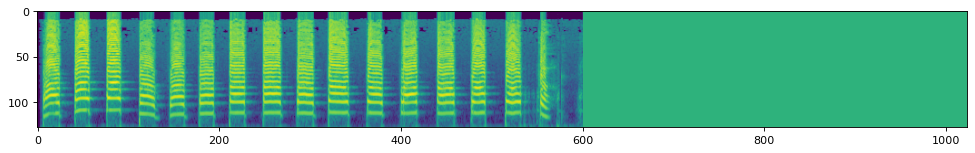

In [622]:
plt.figure(num=1, figsize=(15, 15), dpi=80)
plt.imshow(img[0,:,:].transpose(1,0).flip(0))
plt.show()

In [623]:
im2=img[0,:,:].transpose(1,0).flip(0)

In [729]:
heat_maps2.shape

torch.Size([12, 1, 512, 1])

In [730]:
# Resize to image shape
heat_maps3 = F.interpolate(heat_maps2, img.shape[1:3], mode='bicubic', align_corners=False)
heat_maps3 = list(heat_maps3.squeeze(1).cpu().numpy())

In [731]:
heat_maps3[0].shape

(1024, 128)

In [688]:
img.shape[1:3]

torch.Size([1024, 128])

In [691]:
heat_maps4 = [(hm - hm.min()) / (hm.max() - hm.min()) for hm in heat_maps3]

In [692]:
heat_maps4

[array([[0.70891166, 0.289109  , 0.04892905, ..., 0.06764977, 0.05611973,
         0.06095919],
        [0.7089117 , 0.28910893, 0.04892905, ..., 0.06764977, 0.05611973,
         0.06095919],
        [0.70891166, 0.289109  , 0.04892905, ..., 0.06764977, 0.05611973,
         0.06095919],
        ...,
        [0.70891166, 0.289109  , 0.04892905, ..., 0.06764977, 0.05611973,
         0.06095919],
        [0.70891166, 0.28910893, 0.04892905, ..., 0.06764977, 0.05611973,
         0.06095919],
        [0.70891166, 0.28910893, 0.04892905, ..., 0.06764977, 0.05611973,
         0.06095919]], dtype=float32),
 array([[0.17171364, 0.03250698, 0.02830887, ..., 0.02527003, 0.02521201,
         0.02522204],
        [0.17171365, 0.03250698, 0.02830887, ..., 0.02527003, 0.02521201,
         0.02522204],
        [0.17171365, 0.03250698, 0.02830887, ..., 0.02527003, 0.02521201,
         0.02522204],
        ...,
        [0.17171365, 0.03250698, 0.02830887, ..., 0.02527003, 0.02521201,
         0.02522204

In [693]:
img.shape

torch.Size([1, 1024, 128])

In [694]:
img2=img[0,:,:].cpu().numpy()

In [594]:
heat_map_imgs = [overlay_heat_map(img2, heat_map) for heat_map in heat_maps4]

ValueError: operands could not be broadcast together with shapes (128,1024) (128,1024,3) 

In [704]:
cmap = np.zeros([256, 4])
cmap = ListedColormap(cmap)
overlay = cmap(1-heat_maps4[0])[..., :,-1] * 255
heat_map = heat_maps4[0]
#img3 = ((heat_map)*img2  + overlay * (1-heat_map)).astype(np.uint8)
img3 = (img2 * (heat_map) + overlay * (1-heat_map)).astype(np.uint8)

In [696]:
cmap(1-heat_maps4[0])[..., :1,-1].shape

(1024, 1)

In [633]:
heat_map = heat_maps4[0][..., None]
heat_map=heat_map[:,:,0]

In [634]:
overlay=overlay[:,:,0]

In [711]:
(img2 * (heat_map)).shape

(1024, 128)

In [664]:
((1-heat_map)*overlay).shape

(1024, 1024, 1)

In [641]:
img3 = (img2 * (1 - heat_map) + overlay * heat_map).astype(np.uint8)

In [666]:
overlay = cmap(1-heat_maps4[0])[..., :1,-1] * 255


In [740]:
np.mean(heat_maps3,0).shape

(1024, 128)

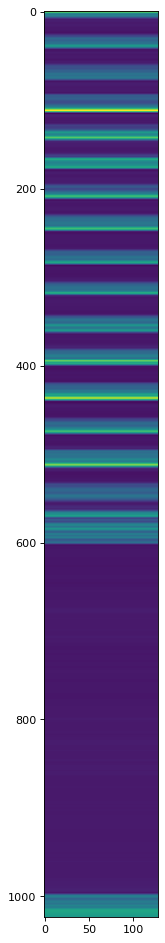

In [741]:
plt.figure(num=1, figsize=(15, 15), dpi=80)
plt.imshow(np.mean(heat_maps3,0))
plt.show()

In [678]:
heat_maps4[0]

array([[0.47219425],
       [0.47189665],
       [0.4710868 ],
       ...,
       [0.04654433],
       [0.04507029],
       [0.04415096]], dtype=float32)

In [742]:
import functools
from collections import OrderedDict

# using wonder's beautiful simplification: https://stackoverflow.com/questions/31174295/getattr-and-setattr-on-nested-objects/31174427?noredirect=1#comment86638618_31174427
def rgetattr(obj, attr, *args):
    def _getattr(obj, attr):
        return getattr(obj, attr, *args)
    return functools.reduce(_getattr, [obj] + attr.split('.'))

class IntermediateLayerGetter:
    def __init__(self, model, return_layers, keep_output=True):
        """Wraps a Pytorch module to get intermediate values
        
        Arguments:
            model {nn.module} -- The Pytorch module to call
            return_layers {dict} -- Dictionary with the selected submodules
            to return the output (format: {[current_module_name]: [desired_output_name]},
            current_module_name can be a nested submodule, e.g. submodule1.submodule2.submodule3)
        
        Keyword Arguments:
            keep_output {bool} -- If True model_output contains the final model's output
            in the other case model_output is None (default: {True})
        Returns:
            (mid_outputs {OrderedDict}, model_output {any}) -- mid_outputs keys are 
            your desired_output_name (s) and their values are the returned tensors
            of those submodules (OrderedDict([(desired_output_name,tensor(...)), ...).
            See keep_output argument for model_output description.
            In case a submodule is called more than one time, all it's outputs are 
            stored in a list.
        """
        self._model = model
        self.return_layers = return_layers
        self.keep_output = keep_output
        #self.task=task
        
    def __call__(self, *args, **kwargs):
        ret = OrderedDict()
        handles = []
        for name, new_name in self.return_layers.items():
            layer = rgetattr(self._model, name)
            
            def hook(module, input, output, new_name=new_name):
                if new_name in ret:
                    if type(ret[new_name]) is list:
                        ret[new_name].append(output)
                    else:
                        ret[new_name] = [ret[new_name], output]
                else:
                    ret[new_name] = output
            try:
                h = layer.register_forward_hook(hook)
            except AttributeError as e:
                raise AttributeError(f'Module {name} not found')
            handles.append(h)
            
        if self.keep_output:
            output = self._model(*args, **kwargs)
        else:
            self._model(*args, **kwargs)
            output = None
            
        for h in handles:
            h.remove()
        
        return ret, output

In [772]:
return_layers = {
    'v.blocks.0.attn': 'nested'}
mid_getter = IntermediateLayerGetter(ast_mdl, return_layers=return_layers, keep_output=True)
mid_outputs, model_output = mid_getter(img, task='ft_cls')

print(model_output)
print(mid_outputs)

tensor([[-3.4342, -3.7988,  2.3724, -0.1815, -2.1943, -0.2187, -5.1853, -6.4177,
          0.2452, -2.2279, -3.1356,  0.1913, -0.7152]],
       grad_fn=<AddmmBackward0>)
OrderedDict([('nested', tensor([[[ 0.2731,  1.3238,  1.9321,  ..., -0.3049, -0.8146, -0.6381],
         [ 2.9256,  2.5281,  1.8921,  ...,  1.3653, -2.2188, -0.8117],
         [ 0.0149, -0.8124,  1.7583,  ...,  0.6304, -2.9812, -0.9910],
         ...,
         [ 1.5564,  1.2169,  0.8553,  ...,  1.3151, -3.2161,  0.0208],
         [ 1.4708,  1.3056,  0.8111,  ...,  1.3929, -3.1588,  0.1536],
         [ 1.4112,  1.3340,  0.5638,  ...,  1.3412, -3.0207,  0.4431]]],
       grad_fn=<AddBackward0>))])


In [773]:
mid_outputs["nested"].shape

torch.Size([1, 514, 768])

In [767]:
qkv=mid_outputs["nested"][0,:,:].reshape(514,3,12,64)

In [768]:
qkv[0,0,0,:]

tensor([-0.9365,  0.4894, -0.2263, -0.7221,  0.4107,  0.2247, -0.1135,  0.1247,
        -0.7238,  0.4980,  0.4531, -0.3930,  0.7347, -0.1142, -0.1820, -0.3341,
         0.5814, -0.2725, -0.7489,  0.8560,  0.6192, -0.0818,  0.1689, -0.4480,
         1.2994, -0.0824,  0.9802,  0.9206, -0.0893,  1.4950,  0.0674, -0.9307,
        -0.3374,  0.2105,  1.8090,  0.0319,  1.7910, -0.3139,  0.4585,  0.7342,
        -0.8460,  0.7399,  0.8333, -0.1206, -0.4525,  0.5688,  0.5074, -0.5481,
        -0.6223,  0.0595, -2.0680,  2.8278,  0.8836, -0.2564, -0.8292, -0.4239,
         0.6926,  0.8286,  0.0684,  1.8090, -0.5737, -0.2674,  0.2635,  0.3318],
       grad_fn=<SliceBackward0>)

In [769]:
qkv[0,1,0,:]

tensor([-1.4847,  1.1272, -0.8763, -0.9622,  0.1640,  0.0338,  0.1467,  0.2127,
        -0.2552,  0.4008, -0.1761, -0.9279,  0.7099, -0.1537, -0.7290,  0.6795,
         0.4502, -0.3113, -0.8112,  1.0419,  0.5345, -0.1665,  0.2046, -0.5782,
         1.2175, -0.0605,  0.9404,  1.0640, -0.1302,  1.1129, -0.6124, -0.6426,
        -0.2260, -0.0640,  1.5481, -0.4982,  1.5281, -0.2324,  1.0249,  0.6562,
        -1.0715,  0.8145, -1.2521, -0.3895, -0.3116,  0.4201,  0.6625, -0.8861,
        -0.0456,  0.1443, -1.3548, -0.9109,  0.3961, -0.1541, -1.1185,  0.1740,
         1.0028,  0.2791, -0.5853,  2.2481, -0.7352, -0.0558,  0.5102, -0.1618],
       grad_fn=<SliceBackward0>)

In [743]:
print(ast_mdl)

ASTModel(
  (v): DistilledVisionTransformer(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(1, 768, kernel_size=(128, 2), stride=(128, 2))
    )
    (pos_drop): Dropout(p=0.0, inplace=False)
    (blocks): ModuleList(
      (0): Block(
        (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=768, out_features=2304, bias=True)
          (attn_drop): Dropout(p=0.0, inplace=False)
          (proj): Linear(in_features=768, out_features=768, bias=True)
          (proj_drop): Dropout(p=0.0, inplace=False)
        )
        (drop_path): Identity()
        (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): Mlp(
          (fc1): Linear(in_features=768, out_features=3072, bias=True)
          (act): GELU()
          (fc2): Linear(in_features=3072, out_features=768, bias=True)
          (drop): Dropout(p=0.0, inplace=False)
        )
      )
      (1): Block(
        (norm1): LayerNorm((768

In [774]:
from torchvision.models.feature_extraction import get_graph_node_names
from pprint import pprint
from timm.models.vision_transformer import PatchEmbed


In [796]:
{'concrete_args': ['task: ft_cls']}

{'concrete_args': ['task: ft_cls']}

In [802]:

train_nodes, eval_nodes = get_graph_node_names(ast_mdl, tracer_kwargs={'leaf_modules': [PatchEmbed]},
                                              )


TraceError: symbolically traced variables cannot be used as inputs to control flow

In [781]:

traced=torch.fx.symbolic_trace(ast_mdl, concrete_args={'task': 'ft_cls'})

In [829]:
from torchvision.models.feature_extraction import NodePathTracer

In [832]:
tracc=NodePathTracer()

In [865]:
g1=tracc.trace(ast_mdl,concrete_args={'task': 'ft_cls'})

In [838]:
from torch.fx.graph_module import GraphModule

In [866]:
print(traced.graph)

graph():
    %x : [#users=1] = placeholder[target=x]
    %task_1 : [#users=1] = placeholder[target=task_1]
    %eq : [#users=1] = call_function[target=operator.eq](args = (%task_1, ft_cls), kwargs = {})
    %_assert : [#users=0] = call_function[target=torch._assert](args = (%eq, task has been specialized to have value ft_cls), kwargs = {})
    %cluster : [#users=0] = placeholder[target=cluster](default=True)
    %mask_patch : [#users=0] = placeholder[target=mask_patch](default=400)
    %unsqueeze : [#users=1] = call_method[target=unsqueeze](args = (%x, 1), kwargs = {})
    %transpose : [#users=2] = call_method[target=transpose](args = (%unsqueeze, 2, 3), kwargs = {})
    %getattr_1 : [#users=1] = call_function[target=builtins.getattr](args = (%transpose, shape), kwargs = {})
    %getitem : [#users=2] = call_function[target=operator.getitem](args = (%getattr_1, 0), kwargs = {})
    %v_patch_embed_proj : [#users=1] = call_module[target=v.patch_embed.proj](args = (%transpose,), kwargs = {

In [887]:
traced = GraphModule(tracc.root, g1.blocks.0.attn.matmul,"test")

SyntaxError: invalid syntax (1755823209.py, line 1)

In [885]:
traced.v.blocks

Module(
  (0): Module(
    (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
    (attn): Module(
      (qkv): Linear(in_features=768, out_features=2304, bias=True)
      (attn_drop): Dropout(p=0.0, inplace=False)
      (proj): Linear(in_features=768, out_features=768, bias=True)
      (proj_drop): Dropout(p=0.0, inplace=False)
    )
    (drop_path): Identity()
    (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
    (mlp): Module(
      (fc1): Linear(in_features=768, out_features=3072, bias=True)
      (act): GELU()
      (drop): Dropout(p=0.0, inplace=False)
      (fc2): Linear(in_features=3072, out_features=768, bias=True)
    )
  )
  (1): Module(
    (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
    (attn): Module(
      (qkv): Linear(in_features=768, out_features=2304, bias=True)
      (attn_drop): Dropout(p=0.0, inplace=False)
      (proj): Linear(in_features=768, out_features=768, bias=True)
      (proj_drop): Dropout(p=0.0, inplace=Fal

In [861]:
k=traced(img,'ft_cls',)

TypeError: forward() got an unexpected keyword argument 'return_nodes'

In [886]:
traced

blocks.0.attn.matmul(
  (v): Module(
    (patch_embed): Module(
      (proj): Conv2d(1, 768, kernel_size=(128, 2), stride=(128, 2))
    )
    (pos_drop): Dropout(p=0.0, inplace=False)
    (blocks): Module(
      (0): Module(
        (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (attn): Module(
          (qkv): Linear(in_features=768, out_features=2304, bias=True)
          (attn_drop): Dropout(p=0.0, inplace=False)
          (proj): Linear(in_features=768, out_features=768, bias=True)
          (proj_drop): Dropout(p=0.0, inplace=False)
        )
        (drop_path): Identity()
        (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): Module(
          (fc1): Linear(in_features=768, out_features=3072, bias=True)
          (act): GELU()
          (drop): Dropout(p=0.0, inplace=False)
          (fc2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (1): Module(
        (norm1): LayerNorm((768,), eps=1e-06,

In [804]:
from torchvision.models.feature_extraction import create_feature_extractor

In [823]:
result_tracer_kwargs = {}
result_tracer_kwargs["concrete_args"] = (
        tuple(set(" v","ft_cls")))

TypeError: set expected at most 1 arguments, got 2

In [836]:
feature_extractor = create_feature_extractor(ast_mdl, return_nodes=['blocks.0.attn.matmul'])

TraceError: symbolically traced variables cannot be used as inputs to control flow

In [784]:
print(traced.graph)

graph():
    %x : [#users=1] = placeholder[target=x]
    %task_1 : [#users=1] = placeholder[target=task_1]
    %eq : [#users=1] = call_function[target=operator.eq](args = (%task_1, ft_cls), kwargs = {})
    %_assert : [#users=0] = call_function[target=torch._assert](args = (%eq, task has been specialized to have value ft_cls), kwargs = {})
    %cluster : [#users=0] = placeholder[target=cluster](default=True)
    %mask_patch : [#users=0] = placeholder[target=mask_patch](default=400)
    %unsqueeze : [#users=1] = call_method[target=unsqueeze](args = (%x, 1), kwargs = {})
    %transpose : [#users=2] = call_method[target=transpose](args = (%unsqueeze, 2, 3), kwargs = {})
    %getattr_1 : [#users=1] = call_function[target=builtins.getattr](args = (%transpose, shape), kwargs = {})
    %getitem : [#users=2] = call_function[target=operator.getitem](args = (%getattr_1, 0), kwargs = {})
    %v_patch_embed_proj : [#users=1] = call_module[target=v.patch_embed.proj](args = (%transpose,), kwargs = {

In [932]:
# can we just make a new AST model that doesn't have that weirdness
import torch.nn as nn
import torch
import sys
sys.path.append("/data/sls/scratch/yuangong/aed-trans/src/models/")
sys.path.append("/data/sls/scratch/yuangong/aed-trans/src/")
from timm.models.layers import trunc_normal_
import timm
import numpy as np
from timm.models.layers import to_2tuple
from random import randrange
from matplotlib import pyplot as plt
import random
class ASTModel_cls(nn.Module):
    def __init__(self, label_dim=527,
                 fshape=128, tshape=2, fstride=128, tstride=2,
                 input_fdim=128, input_tdim=1024, model_size='base',
                 pretrain_stage=True, load_pretrained_mdl_path=None):

        super(ASTModel_cls, self).__init__()
        assert timm.__version__ == '0.4.5', 'Please use timm == 0.4.5, the code might not be compatible with newer versions.'

        # override timm input shape restriction
        timm.models.vision_transformer.PatchEmbed = PatchEmbed

        # pretrain the AST models
        if pretrain_stage == True:
            if load_pretrained_mdl_path != None:
                raise ValueError('Setting load_pretrained_mdl_path at pretraining stage is useless, pretraining is always from scratch, please change it to None.')
            if fstride != fshape or tstride != tshape:
                raise ValueError('fstride != fshape or tstride != tshape, they must be same at the pretraining stage, patch split overlapping is not supported.')

            # if AudioSet pretraining is not used (but ImageNet pretraining may still apply)
            if model_size == 'tiny':
                self.v = timm.create_model('vit_deit_tiny_distilled_patch16_224', pretrained=False)
                self.heads, self.depth = 3, 12
                self.cls_token_num = 2
            elif model_size == 'small':
                self.v = timm.create_model('vit_deit_small_distilled_patch16_224', pretrained=False)
                self.heads, self.depth = 6, 12
                self.cls_token_num = 2
            elif model_size == 'base':
                self.v = timm.create_model('vit_deit_base_distilled_patch16_384', pretrained=False)
                self.heads, self.depth = 12, 12
                self.cls_token_num = 2
            elif model_size == 'base_nokd':
                self.v = timm.create_model('vit_deit_base_patch16_384', pretrained=False)
                self.heads, self.depth = 12, 12
                self.cls_token_num = 1
            else:
                raise Exception('Model size must be one of tiny, small, base, base_nokd')

            self.original_num_patches = self.v.patch_embed.num_patches
            self.oringal_hw = int(self.original_num_patches ** 0.5)
            self.original_embedding_dim = self.v.pos_embed.shape[2]

            # SSL Pretraining Code
            self.softmax = nn.Softmax(dim=-1)
            self.lsoftmax = nn.LogSoftmax(dim=-1)
            self.fshape, self.tshape = fshape, tshape
            self.fstride, self.tstride = fstride, tstride
            self.input_fdim, self.input_tdim = input_fdim, input_tdim
            # this is a trick to make state_dict to track pretraining input_fdim and input_tdim and save them by using torch.save
            self.p_input_fdim, self.p_input_tdim = nn.Parameter(torch.tensor(input_fdim), requires_grad=False), nn.Parameter(torch.tensor(input_tdim), requires_grad=False)

            # masked patch classification (discriminative objective) layer
            # we use two layers for pretext task, but using a single layer has similar performance.
            # we map the output of transformer (768-dim for base models) to 256-dim patch input space, and then dot product with flattened patch input (also 256-dim) to calculate loss.
            # alternatively, you can map the output of transformer to 768-dim patch embedding space, and dot product with patch embedding. Performance-wise they are similar, but map to 256 space is more efficient.
            self.cpredlayer = nn.Sequential(nn.Linear(self.original_embedding_dim, self.original_embedding_dim), nn.ReLU(), nn.Linear(self.original_embedding_dim, 256))
            # masked patch reconstruction (generative objective) layer
            self.gpredlayer = nn.Sequential(nn.Linear(self.original_embedding_dim, self.original_embedding_dim), nn.ReLU(), nn.Linear(self.original_embedding_dim, 256))
            self.unfold = torch.nn.Unfold(kernel_size=(fshape, tshape), stride=(fstride, tstride))

            # we use learnable mask embedding (follow the BEIT paper), but using a fixed mask embedding (e.g., 0) leads to same performance.
            self.mask_embed = nn.Parameter(torch.zeros([1, 1, self.original_embedding_dim]))
            self.mask_embed = torch.nn.init.xavier_normal_(self.mask_embed)

            # get the intermediate shape
            self.p_f_dim, self.p_t_dim = self.get_shape(fstride, tstride, input_fdim, input_tdim, fshape, tshape)
            num_patches = self.p_f_dim * self.p_t_dim
            self.num_patches = num_patches
            self.v.patch_embed.num_patches = num_patches
            print('pretraining patch split stride: frequency={:d}, time={:d}'.format(fstride, tstride))
            print('pretraining patch shape: frequency={:d}, time={:d}'.format(fshape, tshape))
            print('pretraining patch array dimension: frequency={:d}, time={:d}'.format(self.p_f_dim, self.p_t_dim))
            print('pretraining number of patches={:d}'.format(num_patches))

            # the linear patch projection layer, use 1 channel for spectrogram rather than the original 3 channels for RGB images.
            new_proj = torch.nn.Conv2d(1, self.original_embedding_dim, kernel_size=(fshape, tshape), stride=(fstride, tstride))
            self.v.patch_embed.proj = new_proj

            # use trainable positional embedding
            new_pos_embed = nn.Parameter(torch.zeros(1, self.v.patch_embed.num_patches + self.cls_token_num, self.original_embedding_dim))
            self.v.pos_embed = new_pos_embed
            trunc_normal_(self.v.pos_embed, std=.02)

        # use a pretrained models for finetuning
        elif pretrain_stage == False:
            device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
            if load_pretrained_mdl_path == None:
                raise ValueError('Please set load_pretrained_mdl_path to load a pretrained models.')
            sd = torch.load(load_pretrained_mdl_path, map_location=device)
            # get the fshape and tshape, input_fdim and input_tdim in the pretraining stage
            try:
                p_fshape, p_tshape = sd['module.v.patch_embed.proj.weight'].shape[2], sd['module.v.patch_embed.proj.weight'].shape[3]
                p_input_fdim, p_input_tdim = sd['module.p_input_fdim'].item(), sd['module.p_input_tdim'].item()
            except:
                raise  ValueError('The model loaded is not from a torch.nn.Dataparallel object. Wrap it with torch.nn.Dataparallel and try again.')

            print('now load a SSL pretrained models from ' + load_pretrained_mdl_path)
            # during pretraining, fstride=fshape and tstride=tshape because no patch overlapping is used
            # here, input_fdim and input_tdim should be that used in pretraining, not that in the fine-tuning.
            # we need to know input_fdim and input_tdim to do positional embedding cut/interpolation.
            # generally it should be better to use same input_fdim during pretraining and finetuning, but input_tdim can be safely different
            audio_model = ASTModel_cls(fstride=p_fshape, tstride=p_tshape, fshape=p_fshape, tshape=p_tshape,
                                   input_fdim=p_input_fdim, input_tdim=p_input_tdim, pretrain_stage=True, model_size=model_size)
            audio_model = torch.nn.DataParallel(audio_model)
            audio_model.load_state_dict(sd, strict=False)

            self.v = audio_model.module.v
            self.original_embedding_dim = self.v.pos_embed.shape[2]
            self.cls_token_num = audio_model.module.cls_token_num

            # mlp head for fine-tuning
            self.mlp_head = nn.Sequential(nn.LayerNorm(self.original_embedding_dim),
                                          nn.Linear(self.original_embedding_dim, label_dim))

            f_dim, t_dim = self.get_shape(fstride, tstride, input_fdim, input_tdim, fshape, tshape)
            # patch array dimension during pretraining
            p_f_dim, p_t_dim = audio_model.module.p_f_dim, audio_model.module.p_t_dim
            num_patches = f_dim * t_dim
            p_num_patches = p_f_dim * p_t_dim
            self.v.patch_embed.num_patches = num_patches
            print('fine-tuning patch split stride: frequncey={:d}, time={:d}'.format(fstride, tstride))
            print('fine-tuning number of patches={:d}'.format(num_patches))

            # patch shape should be same for pretraining and fine-tuning
            if fshape != p_fshape or tshape != p_tshape:
                raise ValueError('The patch shape of pretraining and fine-tuning is not consistant, pretraining: f={:d}, t={:d}, finetuning: f={:d}, t={:d}'.format(p_fshape, p_tshape, fshape, tshape))

            # patch split stride generally should be different for pretraining and fine-tuning, as patch split overlapping is only used in finetuning
            # during pretraining, p_fshape = p_fstride and p_tshape = p_tstride
            if fstride != p_fshape or tstride != p_tshape:
                # initialize a new patch embedding layer with desired new stride.
                new_proj = torch.nn.Conv2d(1, self.original_embedding_dim, kernel_size=(fshape, tshape), stride=(fstride, tstride))
                # but the weights of patch embedding layer is still got from the pretrained models
                new_proj.weight = torch.nn.Parameter(torch.sum(self.v.patch_embed.proj.weight, dim=1).unsqueeze(1))
                new_proj.bias = self.v.patch_embed.proj.bias
                self.v.patch_embed.proj = new_proj

            new_pos_embed = self.v.pos_embed[:, self.cls_token_num:, :].detach().reshape(1, p_num_patches, self.original_embedding_dim).transpose(1, 2).reshape(1, self.original_embedding_dim, p_f_dim, p_t_dim)
            # cut or interpolate the positional embedding
            if t_dim < p_t_dim:
                new_pos_embed = new_pos_embed[:, :, :, int(p_t_dim/2) - int(t_dim / 2): int(p_t_dim/2) - int(t_dim / 2) + t_dim]
            else:
                new_pos_embed = torch.nn.functional.interpolate(new_pos_embed, size=(8, t_dim), mode='bilinear')
            if f_dim < p_f_dim:
                new_pos_embed = new_pos_embed[:, :, int(p_f_dim/2) - int(f_dim / 2): int(p_f_dim/2) - int(f_dim / 2) + t_dim, :]
            else:
                new_pos_embed = torch.nn.functional.interpolate(new_pos_embed, size=(f_dim, t_dim), mode='bilinear')

            new_pos_embed = new_pos_embed.reshape(1, self.original_embedding_dim, num_patches).transpose(1, 2)
            self.v.pos_embed = nn.Parameter(torch.cat([self.v.pos_embed[:, :self.cls_token_num, :].detach(), new_pos_embed], dim=1))

    # get the shape of intermediate representation.
    def get_shape(self, fstride, tstride, input_fdim, input_tdim, fshape, tshape):
        test_input = torch.randn(1, 1, input_fdim, input_tdim)
        test_proj = nn.Conv2d(1, self.original_embedding_dim, kernel_size=(fshape, tshape), stride=(fstride, tstride))
        test_out = test_proj(test_input)
        f_dim = test_out.shape[2]
        t_dim = test_out.shape[3]
        return f_dim, t_dim

    # generate mask for 16*16 patch
    def gen_maskid_patch(self, sequence_len=512, mask_size=100, cluster=3):
        mask_id = []

        # randomize clutering factor in [3,6)
        cur_clus = randrange(cluster) + 3

        while len(list(set(mask_id))) <= mask_size:
            start_id = randrange(sequence_len)

            # this improves the efficiency, but might change the pretrained model
            # while start_id in mask_id:
            #     start_id = randrange(sequence_len)

            cur_mask = []
            for i in range(0, cur_clus):
                for j in range(0, cur_clus):
                    mask_cand = start_id + self.p_t_dim * i + j
                    if mask_cand > 0 and mask_cand < sequence_len:
                        cur_mask.append(mask_cand)
            mask_id = mask_id + cur_mask
        mask_id = list(set(mask_id))[:mask_size]
        return torch.tensor(mask_id)

    # using cluster for frame masking hurts the performance, so just use the naive random sampling
    def gen_maskid_frame(self, sequence_len=512, mask_size=100):
        mask_id = random.sample(range(0, sequence_len), mask_size)
        return torch.tensor(mask_id)

    def finetuningavgtok(self, x):
        B = x.shape[0]
        x = self.v.patch_embed(x)
        if self.cls_token_num == 2:
            cls_tokens = self.v.cls_token.expand(B, -1, -1)
            dist_token = self.v.dist_token.expand(B, -1, -1)
            x = torch.cat((cls_tokens, dist_token, x), dim=1)
        else:
            cls_tokens = self.v.cls_token.expand(B, -1, -1)
            x = torch.cat((cls_tokens, x), dim=1)
        x = x + self.v.pos_embed
        x = self.v.pos_drop(x)

        for blk_id, blk in enumerate(self.v.blocks):
            x = blk(x)
        x = self.v.norm(x)

        # average output of all tokens except cls token(s)
        x = torch.mean(x[:, self.cls_token_num:, :], dim=1)
        x = self.mlp_head(x)
        return x

    def finetuningcls(self, x):
        B = x.shape[0]
        x = self.v.patch_embed(x)
        if self.cls_token_num == 2:
            cls_tokens = self.v.cls_token.expand(B, -1, -1)
            dist_token = self.v.dist_token.expand(B, -1, -1)
            x = torch.cat((cls_tokens, dist_token, x), dim=1)
        else:
            cls_tokens = self.v.cls_token.expand(B, -1, -1)
            x = torch.cat((cls_tokens, x), dim=1)
        x = x + self.v.pos_embed
        x = self.v.pos_drop(x)

        for blk_id, blk in enumerate(self.v.blocks):
            x = blk(x)
        x = self.v.norm(x)

        # if models has two cls tokens (DEIT), average as the clip-level representation
        if self.cls_token_num == 2:
            x = (x[:, 0] + x[:, 1]) / 2
        else:
            x = x[:, 0]
        x = self.mlp_head(x)
        return x

    # masked patch pretraining with discriminative objective
    def mpc(self, x, mask_patch, cluster, show_mask=False):
        input = self.unfold(x).transpose(1, 2)
        B = x.shape[0]
        # x in shape (batch_size, sequence_len, embedding dim)
        x = self.v.patch_embed(x)

        # encode the patch
        # size 12(batch_size) * 100(#mask_patch) * 768(hidden_dim), prepare to save the true values of masked samples
        encode_samples = torch.empty((B, mask_patch, 256), device=x.device, requires_grad=False).float()
        # size 12(batch_size) * 100(#mask_patch), index of masked patches
        mask_index = torch.empty((B, mask_patch), device=x.device, requires_grad=False).long()
        # size 12(batch_size) * 512(sequence_len) * 768(hidden_dim)
        mask_dense = torch.ones([x.shape[0], x.shape[1], x.shape[2]], device=x.device)

        # for each audio clip in the batch
        for i in range(B):
            # randomly generate #mask_patch mask indexes without duplicate
            if cluster == True:
                # use this if you are masking e.g. 16*16 patches
                mask_index[i] = self.gen_maskid_patch(self.num_patches, mask_patch)
            else:
                # use this if you are masking frame, i.e., 128*2 patches
                mask_index[i] = self.gen_maskid_frame(self.num_patches, mask_patch)
            # copy the masked embeddings, note gradients are stopped in this path
            encode_samples[i] = input[i, mask_index[i], :].clone().detach()
            # mask the encode samples with 0
            mask_dense[i, mask_index[i], :] = 0

        # follow BEIT paper, mask with learnable masking embedding, but no performance diff observed compared with masking with 0s.
        mask_tokens = self.mask_embed.expand(B, x.shape[1], -1)

        # mask the patch
        x = x * mask_dense + (1-mask_dense) * mask_tokens

        # pass through the Transformer layers
        cls_tokens = self.v.cls_token.expand(B, -1, -1)  # stole cls_tokens impl from Phil Wang, thanks
        dist_token = self.v.dist_token.expand(B, -1, -1)
        x = torch.cat((cls_tokens, dist_token, x), dim=1)
        x = x + self.v.pos_embed
        x = self.v.pos_drop(x)
        for blk in self.v.blocks:
            x = blk(x)
        x = self.v.norm(x)

        # prediction of the masked patch
        pred = torch.empty((B, mask_patch, 256), device=x.device).float()  # e.g. size 12*100*768
        for i in range(B):
            #  +2 for indexes because skipping the cls and dis token
            # we map the output of transformer (768-dim for base models) to 256-dim patch input space, and then dot product with flattened patch input (also 256-dim) to calculate loss.
            # alternatively, you can map the output of transformer to 768-dim patch embedding space, and dot product with patch embedding. Performance-wise they are similar, but map to 256 space is more efficient.
            pred[i] = self.cpredlayer(x[i, mask_index[i] + self.cls_token_num, :])

        # calculate the NCE loss
        nce = torch.tensor(0.0).to(x.device)
        correct = torch.tensor(0.0).to(x.device)
        for i in np.arange(0, B):
            # negative samples are from the same batch
            # equation (1) of the ssast paper
            total = torch.mm(encode_samples[i], torch.transpose(pred[i], 0, 1))  # e.g. size 100*100
            correct += torch.sum(torch.eq(torch.argmax(self.softmax(total), dim=0), torch.arange(0, mask_patch, device=x.device)))  # correct is a tensor
            nce += torch.sum(torch.diag(self.lsoftmax(total)))  # nce is a tensor
        acc = 1. * correct / (B * mask_patch)
        nce = nce / (-1. * B * mask_patch)

        # visualize the masked area, for probing test only, set show_mask = False for any training/inference.
        if show_mask == False:
            return acc, nce
        else:
            if B > 1:
                raise Exception('Currently only support single spectrogram probing test.')

            self.mask_correct = torch.nn.Parameter(torch.arange(0, mask_patch), requires_grad=False)

            pred = input.clone()  # [B, 512, 256]
            masked = input.clone()

            for i in range(B):
                result = [float(t) * 99 for t in torch.eq(torch.argmax(self.softmax(total), dim=0), self.mask_correct)]
                pred[i, mask_index[i], :] = torch.tensor(result).reshape(mask_patch, 1).expand(mask_patch, 256)
                masked[i, mask_index[i], :] = 99.0

            # print(total)
            # print(self.softmax(total))
            # print(torch.argmax(self.softmax(total), dim=0))
            # print(self.mask_correct)
            # print(torch.eq(torch.argmax(self.softmax(total), dim=0), self.mask_correct))
            # print([float(t)*99 for t in torch.eq(torch.argmax(self.softmax(total), dim=0), self.mask_correct)])

            fold = torch.nn.Fold(output_size=([self.input_fdim, self.input_tdim]), kernel_size=(self.fshape, self.tshape), stride=(self.fstride, self.tstride))
            pred = fold(pred.transpose(1, 2))
            masked = fold(masked.transpose(1, 2))

            return pred, masked

    # # masked patch pretraining with generative objective
    def mpg(self, input, mask_patch, cluster):
        B = input.shape[0]
        x = self.v.patch_embed(input)
        input = self.unfold(input).transpose(1, 2)

        # size 12(batch_size) * 100(#mask_patch), index of masked patches
        mask_index = torch.empty((B, mask_patch), device=x.device, requires_grad=False).long()
        # size 12(batch_size) * 512(sequence_len) * 768(hidden_dim)
        mask_dense = torch.ones([x.shape[0], x.shape[1], x.shape[2]], device=x.device)
        for i in range(B):
            # randomly generate #mask_patch mask indexes without duplicate
            if cluster == True:
                # use this if you are masking e.g. 16*16 patches
                mask_index[i] = self.gen_maskid_patch(self.num_patches, mask_patch)
            else:
                # use this if you are masking frame, i.e., 128*2 patches
                mask_index[i] = self.gen_maskid_frame(self.num_patches, mask_patch)
            mask_dense[i, mask_index[i], :] = 0

        mask_tokens = self.mask_embed.expand(B, x.shape[1], -1)

        # follow BEIT paper, mask with learnable masking embedding, but no performance diff observed compared with masking with 0s.
        x = x * mask_dense + (1-mask_dense) * mask_tokens

        # go through the Transformer layers
        cls_tokens = self.v.cls_token.expand(B, -1, -1)  # stole cls_tokens impl from Phil Wang, thanks
        dist_token = self.v.dist_token.expand(B, -1, -1)
        x = torch.cat((cls_tokens, dist_token, x), dim=1)
        x = x + self.v.pos_embed
        x = self.v.pos_drop(x)
        for blk in self.v.blocks:
            x = blk(x)
        x = self.v.norm(x)

        pred = torch.empty((B, mask_patch, self.fshape * self.tshape), device=x.device).float()  # e.g. size 12*100*256
        target = torch.empty((B, mask_patch, self.fshape * self.tshape), device=x.device).float() # e.g. size 12*100*256

        for i in range(B):
            #  +2 for indexes because cls and dis token
            pred[i] = self.gpredlayer(x[i, mask_index[i] + self.cls_token_num, :])
            target[i] = input[i, mask_index[i], :]

        # calculate the MSE loss
        mse = torch.mean((pred - target) ** 2)

        return mse

    def forward(self, x, cluster=True, mask_patch=400):
        # expect input x = (batch_size, time_frame_num, frequency_bins), e.g., (12, 1024, 128)
        x = x.unsqueeze(1)
        x = x.transpose(2, 3)
        return self.finetuningcls(x)

        # finetuning (ft), use the mean of all token (patch) output as clip-level representation.
        # this is default for SSAST fine-tuning as during pretraining, supervision signal is given to each token, not the [cls] token
        #if task == 'ft_avgtok':
        #    return self.finetuningavgtok(x)
        # alternatively, use the [cls] token output as clip-level representation.
        #elif task == 'ft_cls':
        #    return self.finetuningcls(x)
        # pretraining, masked patch classification (discriminative objective)
        #elif task == 'pretrain_mpc':
        #    return self.mpc(x, mask_patch=mask_patch, cluster=cluster)
        # pretraining, masked patch reconstruction (generative objective)
        #elif task == 'pretrain_mpg':
        #    return self.mpg(x, mask_patch=mask_patch, cluster=cluster)
        #elif task == 'visualize_mask':
        #    return self.mpc(x, mask_patch=mask_patch, cluster=cluster, show_mask=True)
        #else:
        #    raise Exception('Task unrecognized.')

In [933]:
input_tdim = 1024

ast_mdl_cls = ASTModel_cls(
    label_dim=len(target_labels),
    fshape=128, tshape=2, fstride=128, tstride=2,input_fdim=128, 
    input_tdim=input_tdim, model_size='base',
    pretrain_stage=False,load_pretrained_mdl_path='./pretrained_model/SSAST-Base-Frame-400.pth'
)

now load a SSL pretrained models from ./pretrained_model/SSAST-Base-Frame-400.pth
pretraining patch split stride: frequency=128, time=2
pretraining patch shape: frequency=128, time=2
pretraining patch array dimension: frequency=1, time=512
pretraining number of patches=512
fine-tuning patch split stride: frequncey=128, time=2
fine-tuning number of patches=512


/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:3635: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


In [934]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
sd = torch.load('./ast_mdl_base_frame_400_speechfeat_13.pt', map_location=device)
ast_mdl_cls.load_state_dict(sd, strict=False)

<All keys matched successfully>

In [894]:
train_nodes, eval_nodes = get_graph_node_names(ast_mdl_cls, tracer_kwargs={'leaf_modules': [PatchEmbed]})

In [898]:
return_nodes = {
    'v.blocks.0.attn.mul': 'attn0',
}

feat_ext = create_feature_extractor(
    ast_mdl_cls, return_nodes=return_nodes,
    tracer_kwargs={'leaf_modules': [PatchEmbed]})

out = feat_ext(img)

In [901]:
out['attn'].shape

torch.Size([1, 12, 514, 514])

In [904]:
ast_mdl_cls.named_modules

<bound method Module.named_modules of ASTModel_cls(
  (v): DistilledVisionTransformer(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(1, 768, kernel_size=(128, 2), stride=(128, 2))
    )
    (pos_drop): Dropout(p=0.0, inplace=False)
    (blocks): ModuleList(
      (0): Block(
        (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=768, out_features=2304, bias=True)
          (attn_drop): Dropout(p=0.0, inplace=False)
          (proj): Linear(in_features=768, out_features=768, bias=True)
          (proj_drop): Dropout(p=0.0, inplace=False)
        )
        (drop_path): Identity()
        (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): Mlp(
          (fc1): Linear(in_features=768, out_features=3072, bias=True)
          (act): GELU()
          (fc2): Linear(in_features=3072, out_features=768, bias=True)
          (drop): Dropout(p=0.0, inplace=False)
        )
      )
      (

In [968]:
import torch
from PIL import Image
import numpy
import sys
from torchvision import transforms
import numpy as np
import cv2

def grad_rollout(attentions, gradients, discard_ratio):
    result = torch.eye(attentions[0].size(-1))
    with torch.no_grad():
        for attention, grad in zip(attentions, gradients):                
            weights = grad
            attention_heads_fused = (attention*weights).mean(axis=1)
            attention_heads_fused[attention_heads_fused < 0] = 0

            # Drop the lowest attentions, but
            # don't drop the class token
            flat = attention_heads_fused.view(attention_heads_fused.size(0), -1)
            _, indices = flat.topk(int(flat.size(-1)*discard_ratio), -1, False)
            #indices = indices[indices != 0]
            flat[0, indices] = 0

            I = torch.eye(attention_heads_fused.size(-1))
            a = (attention_heads_fused + 1.0*I)/2
            a = a / a.sum(dim=-1)
            result = torch.matmul(a, result)
    
    # Look at the total attention between the class token,
    # and the image patches
    mask = result[0, 0 , 2 :]
    # In case of 224x224 image, this brings us from 196 to 14
    #width = int(mask.size(-1)**0.5)
    #mask = mask.reshape(width, width).numpy()
    #mask = mask / np.max(mask)
    return mask    

class VITAttentionGradRollout:
    def __init__(self, model, attention_layer_name='attn_drop',discard_ratio=0.9):
        self.model = model
        self.discard_ratio = discard_ratio
        for name, module in self.model.named_modules():
            if attention_layer_name in name:
                module.register_forward_hook(self.get_attention)
                module.register_backward_hook(self.get_attention_gradient)

        self.attentions = []
        self.attention_gradients = []

    def get_attention(self, module, input, output):
        self.attentions.append(output.cpu())

    def get_attention_gradient(self, module, grad_input, grad_output):
        self.attention_gradients.append(grad_input[0].cpu())

    def __call__(self, input_tensor, label):
        self.model.zero_grad()
        output = self.model(input_tensor)
        #category_mask = torch.zeros(output.size())
        #category_mask[:, category_index] = 1
        criterion = torch.nn.BCEWithLogitsLoss()
        #loss = (output*category_mask).sum()
        loss = criterion(output,label)
        loss.backward()
        return self.attentions, self.attention_gradients,self.discard_ratio

        #return grad_rollout(self.attentions, self.attention_gradients,self.discard_ratio)
    

In [969]:
grad_rollout = VITAttentionGradRollout(ast_mdl_cls, attention_layer_name='attn_drop', discard_ratio=0.9)

In [911]:
spectrogram, label = train_loader.dataset[idx]

In [923]:
spectrogram.size()

torch.Size([1024, 128])

In [925]:
spectrogram.reshape(1,1024,128)

tensor([[[-1.2776, -1.2776, -1.2776,  ..., -1.2776, -1.2776, -1.2776],
         [-1.2776, -1.2776, -1.2776,  ..., -1.2776, -1.2776, -1.2776],
         [-1.2776, -1.2776, -1.2776,  ..., -1.2776, -1.2776, -1.2776],
         ...,
         [ 0.4670,  0.4670,  0.4670,  ...,  0.4670,  0.4670,  0.4670],
         [ 0.4670,  0.4670,  0.4670,  ...,  0.4670,  0.4670,  0.4670],
         [ 0.4670,  0.4670,  0.4670,  ...,  0.4670,  0.4670,  0.4670]]])

In [942]:
label.shape

torch.Size([13])

In [935]:
out=ast_mdl_cls(spectrogram.reshape(1,1024,128))

In [941]:
out.reshape(1,13).shape

torch.Size([1, 13])

In [943]:
criterion(out,label.reshape(1,13))

tensor(0.2443, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)

In [970]:
a,b,c = grad_rollout(spectrogram.reshape(1,1024,128), label.reshape(1,13))

In [964]:
a[0].shape

torch.Size([1, 12, 514, 514])

In [966]:
c

0.9

In [971]:
grad_rollout(a,b,c)

TypeError: __call__() takes 3 positional arguments but 4 were given

In [979]:
def grad_rollout2(attentions, gradients, discard_ratio):
    result = torch.eye(attentions[0].size(-1))
    with torch.no_grad():
        for attention, grad in zip(attentions, gradients):                
            weights = grad
            attention_heads_fused = (attention*weights).mean(axis=1)
            attention_heads_fused[attention_heads_fused < 0] = 0

            # Drop the lowest attentions, but
            # don't drop the class token
            flat = attention_heads_fused.view(attention_heads_fused.size(0), -1)
            _, indices = flat.topk(int(flat.size(-1)*discard_ratio), -1, False)
            #indices = indices[indices != 0]
            flat[0, indices] = 0

            I = torch.eye(attention_heads_fused.size(-1))
            a = (attention_heads_fused + 1.0*I)/2
            a = a / a.sum(dim=-1)
            result = torch.matmul(a, result)
    
    # Look at the total attention between the class token,
    # and the image patches
    mask = result[0, 0 , 2 :]
    # In case of 224x224 image, this brings us from 196 to 14
    #width = int(mask.size(-1)**0.5)
    #mask = mask.reshape(width, width).numpy()
    #mask = mask / np.max(mask)
    return mask

In [980]:
xx=grad_rollout2(a,b,c)

In [985]:
spectrogram.shape

torch.Size([1024, 128])

In [1001]:
att_a=xx.reshape(512,1).repeat(1,128)

In [1010]:
spectrogram.size()[0:2]

torch.Size([1024, 128])

In [1011]:
heat_maps3 = F.interpolate(att_a, 1024*128, mode='bicubic', align_corners=False)

NotImplementedError: Input Error: Only 3D, 4D and 5D input Tensors supported (got 2D) for the modes: nearest | linear | bilinear | bicubic | trilinear (got bicubic)

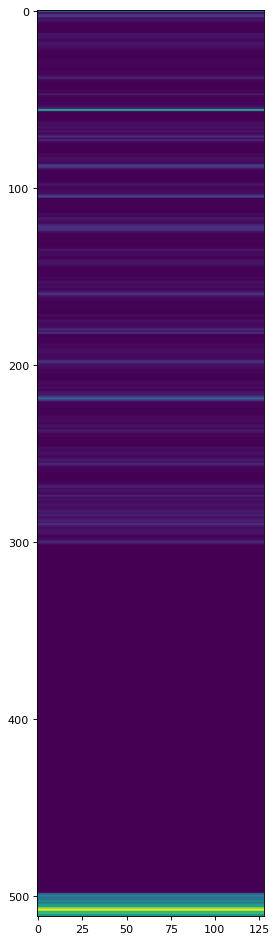

In [1012]:
plt.figure(num=1, figsize=(15, 15), dpi=80)
plt.imshow(att_a)
plt.show()